In [1]:
import torchaudio

In [2]:
import encoders

d:\workspace\Hackathons\ЦП Всероссийский хакатон 2024\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
wav = torchaudio.load("summit.ogg")

In [4]:
wav[0]

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.6184e-06, 2.6362e-06,
         2.6541e-06],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.6184e-06, 2.6362e-06,
         2.6541e-06]])

In [5]:
ee = encoders.EnCodecEmbedder()

d:\workspace\Hackathons\ЦП Всероссийский хакатон 2024\.conda\Lib\site-packages\torch\nn\utils\weight_norm.py:134: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
d:\workspace\Hackathons\ЦП Всероссийский хакатон 2024\.conda\Lib\site-packages\transformers\models\encodec\modeling_encodec.py:120: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("padding_total", torch.tensor(kernel_size - stride, dtype=torch.int64), persistent=False)


In [6]:
ee = ee.to("cuda")

In [7]:
wav[0].mean(0)

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.6184e-06, 2.6362e-06,
        2.6541e-06])

In [9]:
ee.encode(wav[0].mean(0))

OutOfMemoryError: CUDA out of memory. Tried to allocate 3.61 GiB. GPU 0 has a total capacity of 8.00 GiB of which 2.87 GiB is free. Of the allocated memory 4.06 GiB is allocated by PyTorch, and 2.37 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [17]:
ee.processor(raw_audio=wav[0].mean(0), sampling_rate=ee.sampling_rate, return_tensors="pt")["input_values"]

tensor(0.1646)

In [11]:
ee.processor.chunk_length

48000

In [13]:
ee.processor.overlap = 0

In [18]:
ee.processor.max_length

AttributeError: 'EncodecFeatureExtractor' object has no attribute 'max_length'

In [1]:
import torchvision

In [2]:
from torchvision.io.video import read_video
v = read_video("blackborder.garba.mp4")

d:\workspace\Hackathons\ЦП Всероссийский хакатон 2024\.conda\Lib\site-packages\torchvision\io\video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


MemoryError: Unable to allocate 12.9 GiB for an array with shape (2682, 978, 1766, 3) and data type uint8

In [1]:
from extractors import *
from encoders import *

d:\workspace\Hackathons\ЦП Всероссийский хакатон 2024\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
extractor = EveryNFramesExtractor(n=100)

In [3]:
extractor = NEvenlySpacedExtractor(n=15)

In [2]:
extractor = KeyFrameFFmpegExtractor()

In [ ]:
encoder = ColorHistogramEncoder()

In [3]:
encoder = TimmEncoder("mobilenetv3_large_100").to(torch.device("cuda"))

In [3]:
encoder = CLIPEncoder().to(torch.device("cuda"))

d:\workspace\Hackathons\ЦП Всероссийский хакатон 2024\.conda\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [5]:
for i, img in enumerate(extractor("blackborder.garba.mp4")):
    print(i, encoder.encode(img).shape)

0 torch.Size([1, 768])
1 torch.Size([1, 768])
2 torch.Size([1, 768])
3 torch.Size([1, 768])
4 torch.Size([1, 768])
5 torch.Size([1, 768])
6 torch.Size([1, 768])
7 torch.Size([1, 768])
8 torch.Size([1, 768])
9 torch.Size([1, 768])
10 torch.Size([1, 768])
11 torch.Size([1, 768])
12 torch.Size([1, 768])
13 torch.Size([1, 768])
14 torch.Size([1, 768])
15 torch.Size([1, 768])
16 torch.Size([1, 768])
17 torch.Size([1, 768])
18 torch.Size([1, 768])
19 torch.Size([1, 768])
20 torch.Size([1, 768])


In [4]:
from encoders import ColorHistogramEncoder

d:\workspace\Hackathons\ЦП Всероссийский хакатон 2024\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
m = ColorHistogramEncoder()
m.encode(img)

tensor([1716661,     159,     629,     258,     154,     227,     173,     119,
            147,     228,     213,     123,      97,      70,      56,     100,
            173,      56,      35,      33,      33,      26,      42,      58,
             22,      18,      28,      16,       6,      31,      17,      18,
             69,       8,      32,      44,      19,      10,       7,      27,
             10,       6,      52,       5,       7,       7,      10,      17,
             46,       7,       6,       3,       3,      13,      11,       4,
              7,       7,       4,       3,       6,       7,       3,       5,
              4,       7,       5,       4,       6,       7,      14,      41,
              5,      38,      20,       7,      14,       2,       5,       5,
             12,       4,       6,       3,       6,       5,       3,       4,
              6,       6,       7,       6,       5,      44,       8,       2,
             35,       6,       2,      

In [4]:
import timm
from encoders import TimmEncoder

d:\workspace\Hackathons\ЦП Всероссийский хакатон 2024\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
m = TimmEncoder("mobilenetv3_large_100").to(torch.device("cuda"))

d:\workspace\Hackathons\ЦП Всероссийский хакатон 2024\.conda\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\murka\.cache\huggingface\hub\models--timm--mobilenetv3_large_100.ra_in1k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


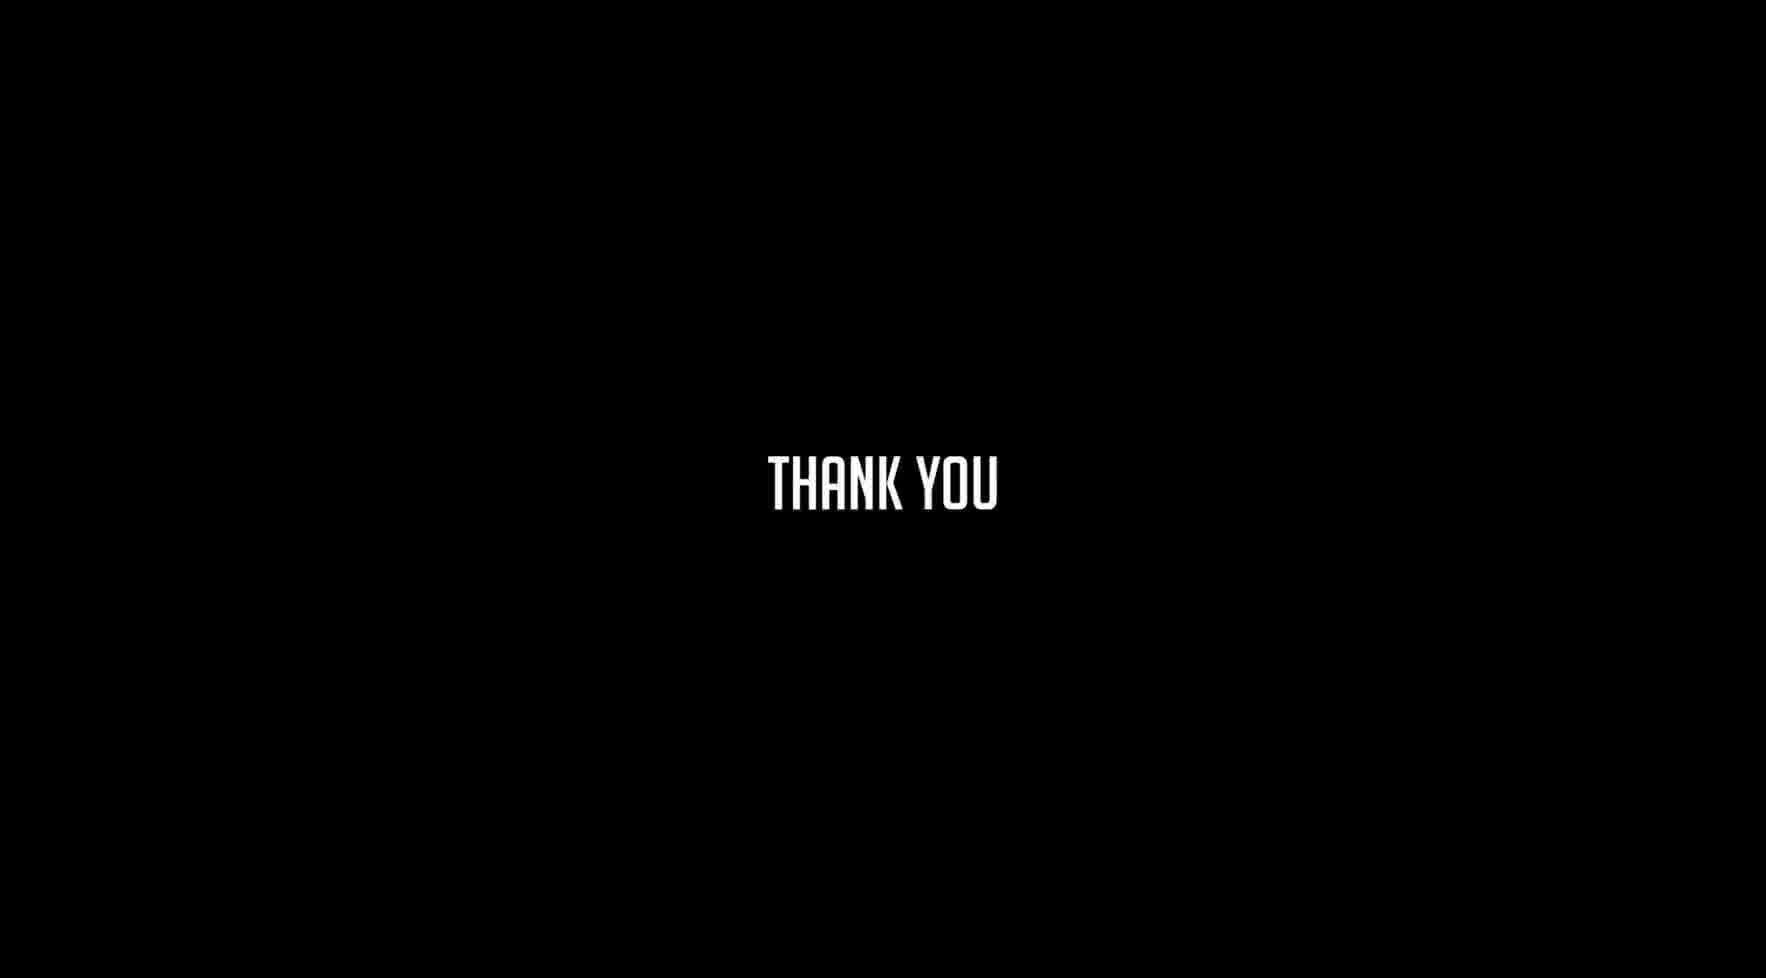

In [21]:
img

In [34]:
m.model(m.transform(img).unsqueeze(0))

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [36]:
m.encode(img).shape

torch.Size([1, 1280])

In [1]:
from extractors import *
from encoders import *
from general import *

d:\workspace\Hackathons\DB_All-Russian_hackathon_2024\.conda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\workspace\Hackathons\DB_All-Russian_hackathon_2024\.conda\lib\site-packages\pyannote\audio\core\io.py:43: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("soundfile")
d:\workspace\Hackathons\DB_All-Russian_hackathon_2024\.conda\lib\site-packages\pyannote\audio\pipelines\speaker_verification.py:43: UserWarning: torchaudio._backend.get_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  backend = torchaudio.get_audio_backend()
d:\workspace\Hackathons\DB_All-Russian_hackathon_2024\.conda\lib\inspect.py:86

In [2]:
video_pipeline = Pipeline.from_yaml("video_pipeline.yaml")

In [4]:
%%time
video_pipeline("blackborder.garba.mp4").shape

CPU times: total: 250 ms
Wall time: 2.11 s


torch.Size([21, 768])

In [2]:
audio_pipeline = Pipeline.from_yaml("audio_pipeline.yaml")

d:\workspace\Hackathons\ЦП Всероссийский хакатон 2024\.conda\Lib\site-packages\torch\nn\utils\weight_norm.py:134: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
d:\workspace\Hackathons\ЦП Всероссийский хакатон 2024\.conda\Lib\site-packages\transformers\models\encodec\modeling_encodec.py:120: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("padding_total", torch.tensor(kernel_size - stride, dtype=torch.int64), persistent=False)


In [3]:
%%time
audio_pipeline("summit.ogg").shape

CPU times: total: 1.88 s
Wall time: 5.2 s


torch.Size([51750, 128])

In [2]:
text_pipeline = Pipeline.from_yaml("text_pipeline.yaml")

Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\murka\.cache\torch\whisperx-vad-segmentation.bin`


No language specified, language will be first be detected for each audio file (increases inference time).
Model was trained with pyannote.audio 0.0.1, yours is 3.1.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.4.1. Bad things might happen unless you revert torch to 1.x.


d:\workspace\Hackathons\DB_All-Russian_hackathon_2024\.conda\lib\site-packages\huggingface_hub\file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [5]:
%%time
text_pipeline("0c630520-6c3c-4948-a196-22a458a9cbdf.mp4")

Detected language: ru (0.99) in first 30s of audio...
CPU times: total: 484 ms
Wall time: 4.43 s


tensor([[ 4.6748e-02,  4.8225e-02, -1.9725e-02,  2.4593e-02,  2.1617e-02,
         -3.3758e-04, -1.8160e-02, -6.8129e-03,  2.8237e-02,  2.2765e-03,
         -4.9124e-02, -1.1008e-02,  1.8058e-01,  3.6302e-02, -3.7373e-02,
         -5.7825e-02,  4.5657e-02, -4.4085e-03,  1.8495e-02, -4.5195e-02,
          6.0609e-02, -2.9299e-02,  4.7384e-02, -1.4773e-02,  2.8036e-03,
         -1.0521e-02, -4.5397e-03,  1.2112e-02, -3.3764e-02,  2.7008e-02,
          1.4335e-02, -7.4867e-02,  1.5845e-02,  2.9658e-02,  6.9715e-03,
          1.9667e-02, -8.8479e-03, -3.1842e-02,  2.1432e-04,  7.5846e-03,
          1.7703e-02, -1.6503e-03,  3.9748e-02, -3.0360e-02,  2.1308e-02,
         -1.2232e-02,  5.1827e-02,  1.7070e-02, -1.0849e-02, -6.8301e-03,
          1.3045e-02,  6.1166e-03,  2.8470e-02,  2.4174e-02, -3.7359e-02,
         -5.0951e-02,  2.6960e-02,  1.9936e-02, -4.9053e-02,  2.7208e-02,
          1.3426e-02,  4.4161e-02, -2.6795e-02,  2.6764e-02,  4.2101e-02,
         -1.1448e-02,  6.3896e-03,  8.